### Load data

In [1]:
import pandas as pd
import joblib

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from lightgbm.sklearn import LGBMRegressor

In [2]:
# Load dataset 
df = joblib.load('df_e_above_hull.pkl')

# Define features and target variable
features = joblib.load('features.pkl')
print('No. of features', len(features))

df.head()

No. of features 1857


,sym_x,sym_y,sym_z,mirror_x,mirror_y,mirror_z,trans_x,trans_y,trans_z,inverse_x,...,glide_y_ohe_b,glide_y_ohe_c,glide_y_ohe_d,glide_y_ohe_n,glide_z_ohe_a,glide_z_ohe_c,glide_z_ohe_d,glide_z_ohe_e,glide_z_ohe_n,e_above_hull
task_id,,,,,,,,,,,,,,,,,,,,,
mp-1,4.0,1.0,2.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0.038770
mp-10,4.0,1.0,2.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0.112397
mp-100,4.0,1.0,2.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0.176155
mp-1000,4.0,1.0,2.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0.000000
mp-10004,1.0,2.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0,0,0,0,0,0,0,0,0,0.000000


In [3]:
target = 'e_above_hull' 

print(target)
print('Max value:', df[target].max())
print('Min value:', df[target].min())

e_above_hull
Max value: 5.272298566499996
Min value: 0.0


### Split & Scale Features

In [4]:
!cd

c:\Users\songy\OneDrive\Documents\GBSFS4MPP_local\new_properties\8 other_properties\e_above_hull


In [5]:
# Split dataset
df_train, df_test = train_test_split(df, test_size=0.2, random_state=42) 

In [6]:
path = 'C:/Users/Songy/OneDrive/Documents/GBSFS4MPP_local/new_properties/8 other_properties/e_above_hull/'
path_to_save = path + target + '_results/'

# Save unscaled data
joblib.dump(df_train, path_to_save + 'df_train_' + target + '.pkl')
joblib.dump(df_test, path_to_save + 'df_test_' + target + '.pkl')

['C:/Users/Songy/OneDrive/Documents/GBSFS4MPP_local/new_properties/8 other_properties/e_above_hull/e_above_hull_results/df_test_e_above_hull.pkl']

In [7]:
# Scale the features
scaling = MinMaxScaler(feature_range=(0, 1))

df_train[features] = pd.DataFrame(
                                    scaling.fit_transform(df_train[features].values),
                                    columns=df_train[features].columns,
                                    index=df_train[features].index
                                )
                                
                                
# Create pandas.Dataframe of scaled test set using scaler as defined using training set
df_test[features] = pd.DataFrame(
                                    scaling.transform(df_test[features].values),
                                    columns=df_test[features].columns,
                                    index=df_test[features].index
                                )

c:\Users\songy\miniconda3\envs\gbfs\lib\site-packages\pandas\core\frame.py:3069: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
c:\Users\songy\miniconda3\envs\gbfs\lib\site-packages\pandas\core\frame.py:3069: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [8]:
# Save 
joblib.dump(df_train, path_to_save + 'df_train_' + target + '_scaled.pkl')
joblib.dump(df_test, path_to_save + 'df_test_' + target + '_scaled.pkl')

['C:/Users/Songy/OneDrive/Documents/GBSFS4MPP_local/new_properties/8 other_properties/e_above_hull/e_above_hull_results/df_test_e_above_hull_scaled.pkl']

#### GBFS

In [9]:
import sys
sys.path.insert(1, 'C:/Users/Songy/OneDrive/Documents/GBSFS4MPP_local/new_properties')

import GBFS as gb

import joblib
import pandas as pd
import numpy as np

In [10]:
# Target
target = 'e_above_hull' 

# Path to training data
path = 'C:/Users/Songy/OneDrive/Documents/GBSFS4MPP_local/new_properties/8 other_properties/e_above_hull/'
path_to_save = path + target + '_results/'
path_to_file = path_to_save + 'df_train_' + target + '_scaled.pkl'

# Either a list or saved file
features = path + 'features.pkl'

problem = 'regression'

In [11]:
# Initialization 
FS = gb.GBFS(
            path_to_file = path_to_file, 
            path_to_save = path_to_save, 
            target = target,
            features = features,
            oversampled_it = False, 
            problem = problem
            )

Name of target column:  e_above_hull
No. of exploratory features:  1857


In [12]:
# Conduct grid search to perform preliminary scan of the hyperparameter space & retrieve a trained model
FS.run(
        boosting_method = 'lightGBM', 
        cv_folds = 1
        )

Model employed:  lightGBM
Total no. of permutations: 18


   (1 of 18)  Attempt:  [('n_estimators', 100), ('learning_rate', 0.1), ('num_leaves', 30)]
   No. of rows in the training set: 30858
   Metric score:  -0.03667
   [*** Current optimal Hyperparameters ***]
Finished loading model, total used 100 iterations


   (2 of 18)  Attempt:  [('n_estimators', 100), ('learning_rate', 0.1), ('num_leaves', 40)]
   No. of rows in the training set: 30858
   Metric score:  -0.03303
   [*** Current optimal Hyperparameters ***]
Finished loading model, total used 100 iterations


   (3 of 18)  Attempt:  [('n_estimators', 100), ('learning_rate', 0.1), ('num_leaves', 50)]
   No. of rows in the training set: 30858
   Metric score:  -0.04680


   (4 of 18)  Attempt:  [('n_estimators', 100), ('learning_rate', 0.2), ('num_leaves', 30)]
   No. of rows in the training set: 30858
   Metric score:  -0.04425


   (5 of 18)  Attempt:  [('n_estimators', 100), ('learning_rate', 0.2), ('num_leaves', 40)]
   No. o

LGBMRegressor(importance_type='gain', n_estimators=500, num_leaves=30,
              objective='regression')

Result saved as: feature_relevance_score_e_above_hull.pkl
Figure saved as: feature_relevance_plot_e_above_hull.png


,feature,relevance_score
0,438,19153.763251
1,441,3748.275214
2,406,2161.844736
3,83,1464.387505
4,density,684.450506
...,...,...
1852,225,0.000000
1853,224,0.000000
1854,223,0.000000
1855,222,0.000000


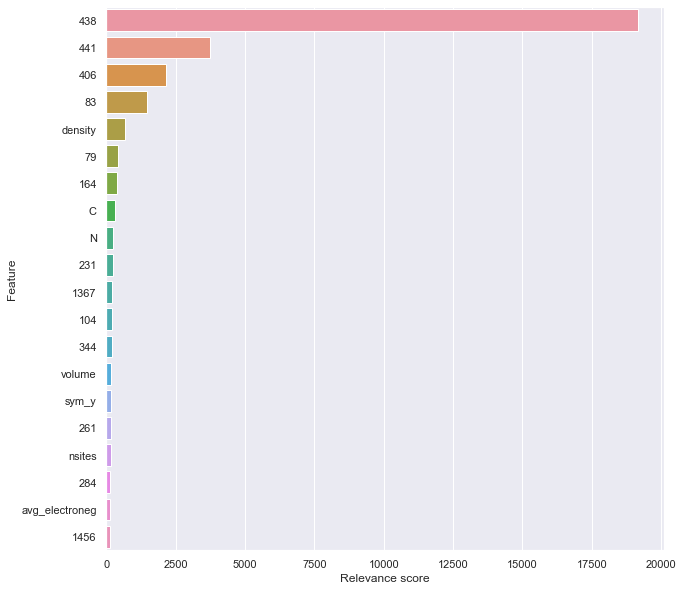

In [13]:
# Obtain feature relevance score
FS.feature_relevance(
                    plot = True, 
                    no_of_features = 20
                    )

In [14]:
# Perform recursive feature selection 
FS.recursive_selection(
                    stratify = False, 
                    oversample_technique = None, 
                    chosen_metric = 'rmse',
                    average = 'weighted',
                    no_to_terminate = 200,
                    max_no_imp = 10
                    )

   No. of rows in training set:  30858
No. of features considering:  1

n=1: mae_train=0.1581, mae_validation=0.1944 
n=1: mse_train=0.0920, mse_validation=0.1177 
n=1: rmse_train=0.3033, rmse_validation=0.3431 
n=1: r2_train=0.6349, r2_validation=0.4277 
n=1: max_error_train=4.7074, max_error_validation=3.9721 
--- 0.8647854328155518 seconds --- 

No. of features considering:  2

n=2: mae_train=0.1367, mae_validation=0.1851 
n=2: mse_train=0.0706, mse_validation=0.1055 
n=2: rmse_train=0.2656, rmse_validation=0.3248 
n=2: r2_train=0.7199, r2_validation=0.4872 
n=2: max_error_train=4.1370, max_error_validation=3.6233 
--- 0.4654231071472168 seconds --- 

No. of features considering:  3

n=3: mae_train=0.1055, mae_validation=0.1836 
n=3: mse_train=0.0383, mse_validation=0.0907 
n=3: rmse_train=0.1958, rmse_validation=0.3012 
n=3: r2_train=0.8479, r2_validation=0.5589 
n=3: max_error_train=4.1434, max_error_validation=3.4840 
--- 0.4854416847229004 seconds --- 

No. of no improvements:  

,train_mae,va_mae,train_mse,va_mse,train_rmse,va_rmse,train_r_sq,va_r_sq,train_max_error,va_max_error
no_of_features,,,,,,,,,,
1,0.158059,0.194383,0.091980,0.117713,0.303282,0.343093,0.634890,0.427729,4.707357,3.972127
2,0.136732,0.185082,0.070567,0.105490,0.265645,0.324792,0.719886,0.487151,4.137025,3.623281
3,0.105472,0.183623,0.038319,0.090740,0.195753,0.301230,0.847894,0.558860,4.143378,3.483959
4,0.099037,0.191693,0.033532,0.098788,0.183118,0.314305,0.866896,0.519733,4.141723,3.364119
5,0.089886,0.171741,0.026604,0.075215,0.163106,0.274253,0.894398,0.634336,2.721061,3.171179
...,...,...,...,...,...,...,...,...,...,...
195,0.043051,0.112297,0.005126,0.036679,0.071599,0.191518,0.979651,0.821681,1.476586,3.101795
196,0.043087,0.111005,0.005134,0.035122,0.071650,0.187407,0.979622,0.829253,1.546445,3.108211
197,0.043047,0.112791,0.005083,0.036294,0.071295,0.190509,0.979823,0.823555,1.386086,3.234249


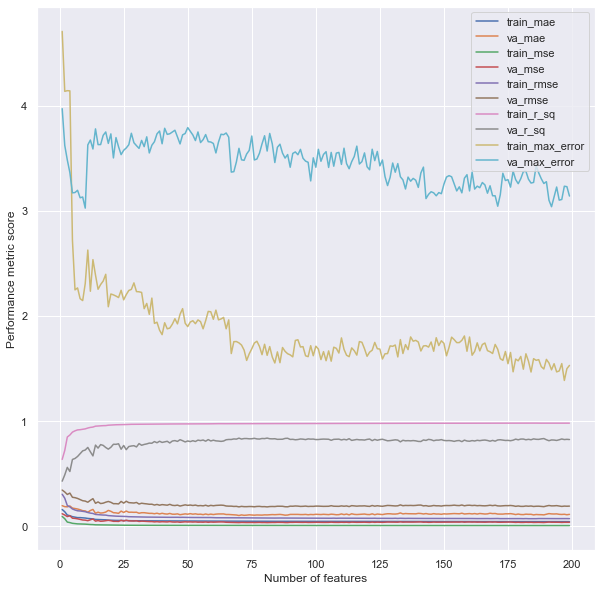

Result saved as: GBFS_convergence_plot_e_above_hull.pkl


<Figure size 720x720 with 0 Axes>

In [15]:
# Plot the result
FS.convergence_plot()

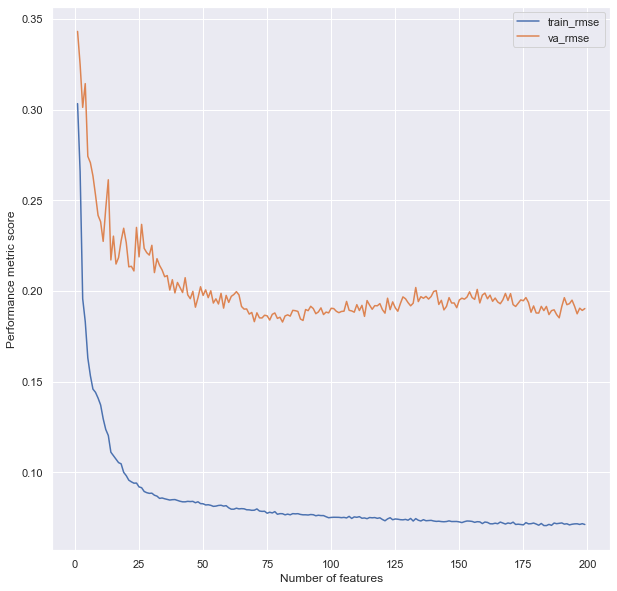

Result saved as: GBFS_convergence_plot_e_above_hull.pkl


<Figure size 720x720 with 0 Axes>

In [16]:
# Plot the result
FS.convergence_plot(
                    train_metric = 'train_rmse',
                    validation_metric = 'va_rmse'
                    )

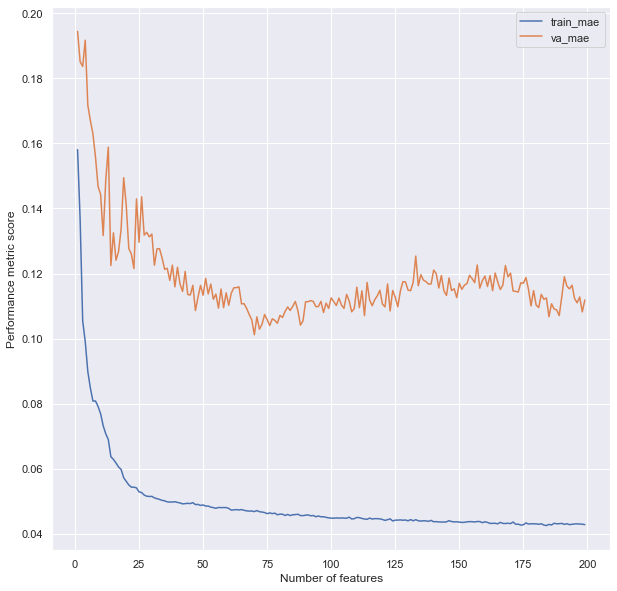

Result saved as: GBFS_convergence_plot_e_above_hull.pkl


<Figure size 720x720 with 0 Axes>

In [17]:
# Plot the result
FS.convergence_plot(
                    train_metric = 'train_mae',
                    validation_metric = 'va_mae'
                    )

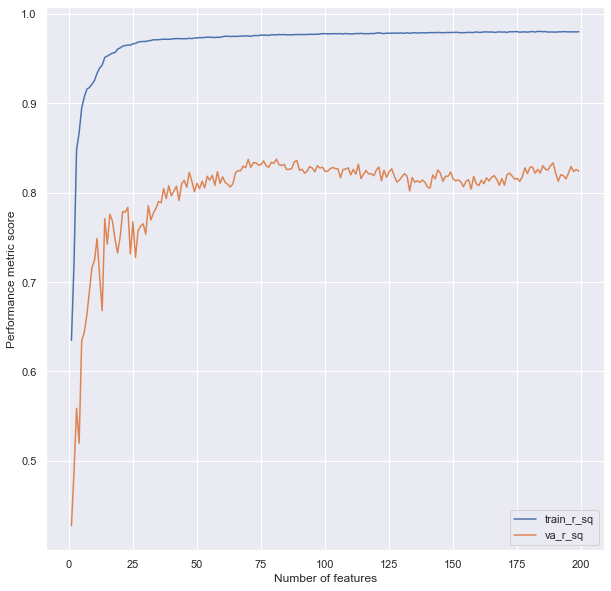

Result saved as: GBFS_convergence_plot_e_above_hull.pkl


<Figure size 720x720 with 0 Axes>

In [18]:
# Plot the result
FS.convergence_plot(
                    train_metric = 'train_r_sq',
                    validation_metric = 'va_r_sq'
                    )

In [19]:
# # Plot the result
# FS.convergence_plot(
#                     train_metric = ['train_r_sq', 'train_rmse', 'train_mae'],
#                     validation_metric = ['va_r_sq', 'va_rmse', 'va_mae']
#                     )

##### Statistical Analyses - Regression

In [20]:
import sys
sys.path.insert(1, 'C:/Users/Songy/OneDrive/Documents/GBSFS4MPP_local/new_properties')

import feature_analyses as fa

import joblib
import pandas as pd

In [21]:
# Target
target = 'e_above_hull' 

# Path to training data
path = 'C:/Users/Songy/OneDrive/Documents/GBSFS4MPP_local/new_properties/8 other_properties/e_above_hull/'
path_to_save = path + target + '_results/'
path_to_file = path_to_save + 'df_train_' + target + '_scaled.pkl'

# Either a list or saved file
features = path + 'features.pkl'

problem = 'regression'

In [22]:
# Initialization 
analyses = fa.perform(
                    path_to_file = path_to_file, 
                    path_to_save = path_to_save, 
                    target = target,
                    features = features
                    )

Name of target column:  e_above_hull
No. of exploratory features:  1857


In [23]:
df = analyses.remove_constant_features()
df.head()

No. of features removed:  97


,sym_x,sym_y,sym_z,mirror_x,mirror_y,mirror_z,trans_x,trans_y,trans_z,inverse_x,...,glide_y_ohe_b,glide_y_ohe_c,glide_y_ohe_d,glide_y_ohe_n,glide_z_ohe_a,glide_z_ohe_c,glide_z_ohe_d,glide_z_ohe_e,glide_z_ohe_n,e_above_hull
task_id,,,,,,,,,,,,,,,,,,,,,
mp-22149,1.0,0.0,0.0,0.0,1.0,0.0,0.6,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.000000
mp-3664,0.0,0.5,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
mp-973283,0.6,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
mp-1100630,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.185332
mp-1185219,0.6,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.037775


In [24]:
df_anova = analyses.ANOVA_F_test(
                                problem='regression', 
                                all_features=False, 
                                csv=False
                                )

df_anova

There are:
No. of categorical features:  28
No. of numerical features:  1732 

Considering only the numerical features. 

Result saved as:  ANOVA_F_test_result_e_above_hull_regression.pkl


,feature_names,f_statistic,f_statistic_scaled
0,440,32323.573396,1.000000e+00
1,438,19962.021234,6.175685e-01
2,842,6683.448817,2.067670e-01
3,441,6158.909889,1.905392e-01
4,843,5792.659164,1.792085e-01
...,...,...,...
1727,834,0.008209,2.277238e-07
1728,La.1,0.008101,2.243974e-07
1729,U,0.003321,7.650719e-08
1730,569,0.003250,7.429176e-08


In [25]:
df_mi = analyses.mutual_information(
                                problem='regression', 
                                csv=False
                                )

df_mi

There are:
No. of categorical features:  28
No. of numerical features:  1732 

Result saved as: MI_result_e_above_hull.pkl


,feature_names,MI,MI_scaled
0,250,0.267795,1.000000
1,381,0.266912,0.996703
2,160,0.266340,0.994568
3,48,0.264860,0.989041
4,393,0.262227,0.979209
...,...,...,...
1749,Ar,0.000000,0.000000
1748,Ac.1,0.000000,0.000000
1746,155,0.000000,0.000000
1745,1465,0.000000,0.000000


#### Feature Engineering 

In [1]:
import sys
sys.path.insert(1, 'C:/Users/Songy/OneDrive/Documents/GBSFS4MPP_local/new_properties')

import feature_engineering as fe

import joblib
import pandas as pd

In [2]:
# Target
target = 'e_above_hull' 

# Path to training data
path = 'C:/Users/Songy/OneDrive/Documents/GBSFS4MPP_local/new_properties/8 other_properties/e_above_hull/'
path_to_save = path + target + '_results/'
path_to_file = path + 'df_e_above_hull.pkl'  # all data

# Either a list or saved file for the features
features = path + 'features.pkl'

problem = 'regression'

In [3]:
# Top n features from ANOVA 
df_anova = joblib.load(path_to_save + 'ANOVA_F_test_result_' + target + '_regression.pkl')

# Top n features
n = 5
anova_features = df_anova['feature_names'].tolist()[:n]

df_anova.iloc[:n, :]

,feature_names,f_statistic,f_statistic_scaled
0,440,32323.573396,1.000000
1,438,19962.021234,0.617569
2,842,6683.448817,0.206767
3,441,6158.909889,0.190539
4,843,5792.659164,0.179208


In [4]:
# Top n features from MI 
df_mi = joblib.load(path_to_save + 'MI_result_' + target + '.pkl')

# Top n features
n = 5
mi_features = df_mi['feature_names'].tolist()[:n]

df_mi.iloc[:n, :]

,feature_names,MI,MI_scaled
0,250,0.267795,1.000000
1,381,0.266912,0.996703
2,160,0.266340,0.994568
3,48,0.264860,0.989041
4,393,0.262227,0.979209


In [5]:
# Top n features from GBFS
df_gbfs = joblib.load(path_to_save + 'feature_relevance_score_' + target + '.pkl')

# Top n features
n = 5
gbfs_features = df_gbfs['feature'].tolist()[:n]

df_gbfs.iloc[:n, :]

,feature,relevance_score
0,438,19153.763251
1,441,3748.275214
2,406,2161.844736
3,83,1464.387505
4,density,684.450506


In [6]:
# Initialization
perform = fe.engineering(
                        path_to_file = path_to_file, 
                        path_to_save = path_to_save, 
                        target = target,
                        features = features
                        )

Name of target column:  e_above_hull
No. of exploratory features:  1857


In [7]:
# Join the features
feature_list = anova_features + mi_features + gbfs_features

print(len(feature_list))
print(feature_list)

15
['440', '438', '842', '441', '843', '250', '381', '160', '48', '393', '438', '441', '406', '83', 'density']


In [8]:
# Perform feature engineering
df, new_cols = perform.brute_force(feature_list = feature_list)

df.head()

,sym_x,sym_y,sym_z,mirror_x,mirror_y,mirror_z,trans_x,trans_y,trans_z,inverse_x,...,83/393,393/density,density/393,406/83,83/406,406/density,density/406,83/density,density/83,e_above_hull
task_id,,,,,,,,,,,,,,,,,,,,,
mp-1,4.0,1.0,2.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.605586,1.343642,0.744246,-0.542784,-1.842353,-0.441659,-2.264193,0.813691,1.228968,0.038770
mp-10,4.0,1.0,2.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,-0.501794,1.014114,0.986083,1.507078,0.663536,-0.766915,-1.303925,-0.508876,-1.965116,0.112397
mp-100,4.0,1.0,2.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,-0.538633,1.015442,0.984793,1.363886,0.733199,-0.745979,-1.340520,-0.546951,-1.828317,0.176155
mp-1000,4.0,1.0,2.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,-0.047934,1.878334,0.532387,5.696105,0.175559,-0.512854,-1.949874,-0.090036,-11.106690,0.000000
mp-10004,1.0,2.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,-0.683790,0.970371,1.030534,1.361585,0.734438,-0.903453,-1.106865,-0.663530,-1.507091,0.000000


In [9]:
perform.save()

Result saved as: df_e_above_hull_engineered_features.pkl
Result saved as: features_e_above_hull_engineered.pkl
Result saved as: df_train_e_above_hull_engineered.pkl
Result saved as: df_test_e_above_hull_engineered.pkl


#### Multi-Collinearity Reduction

In [10]:
import sys
sys.path.insert(1, 'C:/Users/Songy/OneDrive/Documents/GBSFS4MPP_local/new_properties')

import multicollinearity_reduction as mr

import joblib
import pandas as pd
import numpy as np

In [11]:
# Target
target = 'e_above_hull' 

# Path to training data
path = 'C:/Users/Songy/OneDrive/Documents/GBSFS4MPP_local/new_properties/8 other_properties/e_above_hull/'
path_to_save = path + target + '_results/'
path_to_file = path_to_save + 'df_train_' + target + '_engineered.pkl'

# Features 
n = 200 # Most relevant features defined using the GBFS result

gbfs_cols = joblib.load(path_to_save + 'feature_relevance_score_' + target + '.pkl')['feature'].tolist()[:n]
new_cols = joblib.load(path_to_save + 'features_' + target + '_engineered.pkl')
features = gbfs_cols + new_cols

problem = 'regression'

print(len(gbfs_cols))
print(len(new_cols))
len(features)

200
156


356

In [12]:
# Initialize module with path_to_file and path_to_save
data = mr.multicollinearity_reduction(
                                        path_to_file, 
                                        path_to_save, 
                                        target=target,
                                        features = features 
                                        )

Name of target column:  e_above_hull
No. of exploratory features:  356


In [13]:
# Remove features with correlation coeff greather than the threshold
col_corr = data.correlation_analysis(threshold = 0.85)
new_features = data.apply_correlation_filter()

Identified correlated features
No. of features remaining:  163
Features saved as: features_selected_from_correlation_analysis_e_above_hull.pkl


Figure saved as: Dendrogram_e_above_hull.png


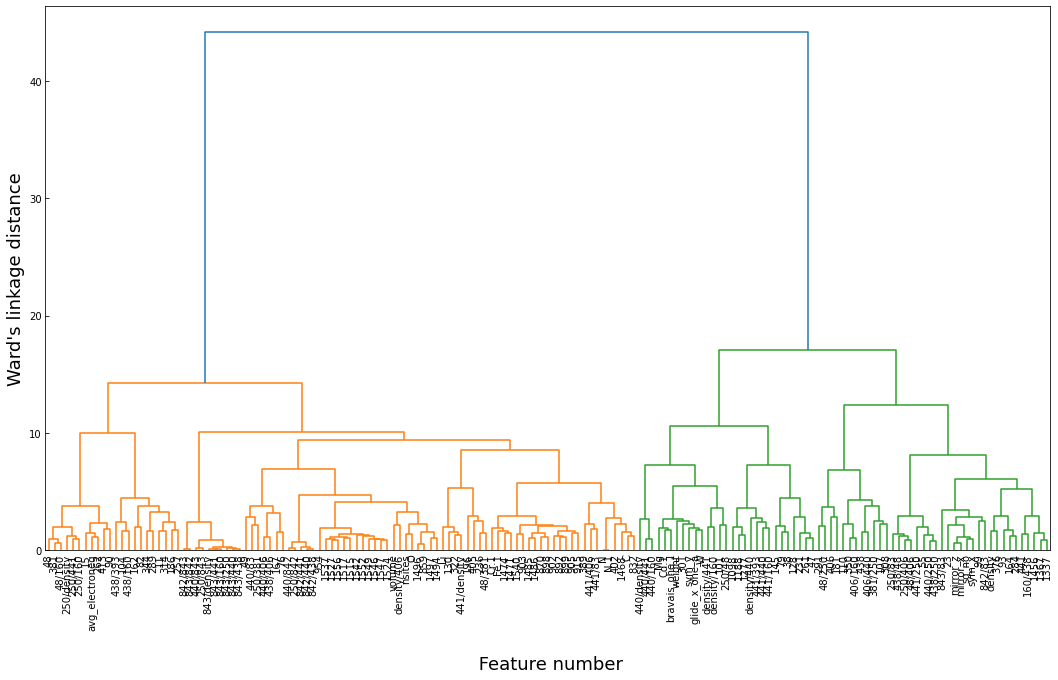

In [14]:
# Perform hierarchical cluster analysis & create the corresponding dendrogram 
data.hierarchical_cluster_analysis()

In [15]:
# Select features based on the given linkage threshold
threshold_list = [1, 2, 3, 4, 5]

for i in threshold_list:
    final_features = data.apply_linkage_threshold(threshold = i)

Number of features remaining:  135
Features saved as features_selected_from_hierarchical_analysis_e_above_hull_threshold_1.pkl
Number of features remaining:  73
Features saved as features_selected_from_hierarchical_analysis_e_above_hull_threshold_2.pkl
Number of features remaining:  37
Features saved as features_selected_from_hierarchical_analysis_e_above_hull_threshold_3.pkl
Number of features remaining:  26
Features saved as features_selected_from_hierarchical_analysis_e_above_hull_threshold_4.pkl
Number of features remaining:  20
Features saved as features_selected_from_hierarchical_analysis_e_above_hull_threshold_5.pkl


In [16]:
# threshold_list = np.linspace(3, 4, 6)

# for i in threshold_list:
#     final_features = data.apply_linkage_threshold(threshold = i)

#### Recursive Feature Elimination

In [17]:
import sys
sys.path.insert(1, 'C:/Users/Songy/OneDrive/Documents/GBSFS4MPP_local/new_properties')

import recursive_feature_elimination as rfe

import joblib
import pandas as pd

In [18]:
# Target
target = 'e_above_hull' 

# Path to training data
path = 'C:/Users/Songy/OneDrive/Documents/GBSFS4MPP_local/new_properties/8 other_properties/e_above_hull/'
path_to_save = path + target + '_results/'
path_to_file = path_to_save + 'df_train_' + target + '_engineered.pkl'

# Features 
features = joblib.load(path_to_save + 'features_selected_from_hierarchical_analysis_' + target + '_threshold_2.pkl')

scaled = False

problem = 'regression'

In [19]:
# Initialize module with path_to_file and path_to_save
run = rfe.recursive_feature_elimination(
                                        path_to_file, 
                                        path_to_save, 
                                        target=target,
                                        features = features,
                                        scaled = False,
                                        problem = problem
                                        )

Target: e_above_hull
No. of features: 73


In [20]:
# Run RFE
estimator = run.base_model(boosting_method = 'lightGBM')
RFE_features = run.perform()

Fitting estimator with 73 features.
Fitting estimator with 72 features.
Fitting estimator with 71 features.
Fitting estimator with 70 features.
Fitting estimator with 69 features.
Fitting estimator with 68 features.
Fitting estimator with 67 features.
Fitting estimator with 66 features.
Fitting estimator with 65 features.
Fitting estimator with 64 features.
Fitting estimator with 63 features.
Fitting estimator with 62 features.
Fitting estimator with 61 features.
Fitting estimator with 60 features.
Fitting estimator with 59 features.
Fitting estimator with 58 features.
Fitting estimator with 57 features.
Fitting estimator with 56 features.
Fitting estimator with 55 features.
Fitting estimator with 54 features.
Fitting estimator with 53 features.
Fitting estimator with 52 features.
Fitting estimator with 51 features.
Fitting estimator with 50 features.
Fitting estimator with 49 features.
Fitting estimator with 48 features.
Fitting estimator with 47 features.
Fitting estimator with 46 fe

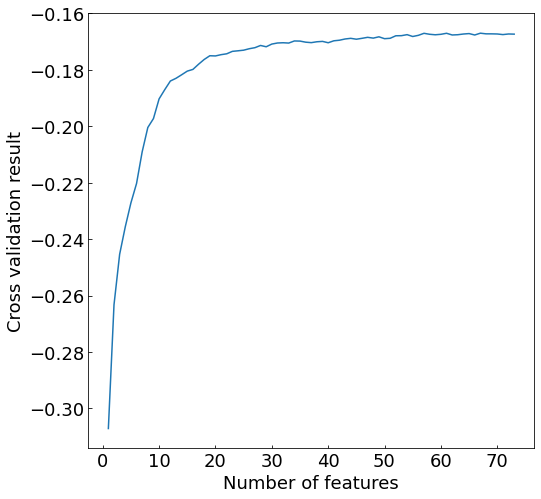

Figure saved as: RFE_plot_e_above_hull.png


In [21]:
# Plot figure
run.RFE_plot()

#### Test Dummy Model

In [1]:
### test result to find best threshold

import pandas as pd
import numpy as np
import joblib
import statsmodels.api as sm
import matplotlib.pyplot as plt

from matplotlib.gridspec import GridSpec
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score, max_error
from sklearn.metrics import explained_variance_score,mean_squared_error
from sklearn.preprocessing import MinMaxScaler

from lightgbm.sklearn import LGBMRegressor

In [2]:
# Target
target = 'e_above_hull' 

# Path to training data
path = 'C:/Users/Songy/OneDrive/Documents/GBSFS4MPP_local/new_properties/8 other_properties/e_above_hull/'
path_to_save = path + target + '_results/'
path_to_file = path_to_save + 'df_train_' + target + '_engineered.pkl'

# Data
df_train = joblib.load(path_to_save + 'df_train_' + target + '_engineered.pkl')
df_test = joblib.load(path_to_save + 'df_test_' + target + '_engineered.pkl')

# Features 
features = joblib.load(path_to_save + 'features_selected_from_hierarchical_analysis_' + target + '_threshold_2.pkl')
scaled = False
print('No. of features:', len(features))

problem = 'regression'

No. of features: 73


In [3]:
# Scale the features
scaling = MinMaxScaler(feature_range=(0, 1))

df_train[features] = pd.DataFrame(
                                    scaling.fit_transform(df_train[features].values),
                                    columns=df_train[features].columns,
                                    index=df_train[features].index
                                )
                                

df_test[features] = pd.DataFrame(
                                    scaling.transform(df_test[features].values),
                                    columns=df_test[features].columns,
                                    index=df_test[features].index
                                )

In [4]:
lgbm = LGBMRegressor(
                    boosting_type ='gbdt',
                    objective='regression',
                    importance_type='gain',
                    learning_rate=0.1,
                    n_estimators=350,
                    num_leaves=40,
                    max_depth=-1,
                    random_state=42
                    )

lgbm.fit(df_train[features], df_train[target].values.ravel())
lgbm

LGBMRegressor(importance_type='gain', n_estimators=350, num_leaves=40,
              objective='regression', random_state=42)

In [5]:
# Predict
predicted_target = lgbm.predict(df_test[features])

# Generate table of results
id_index = df_test.index.tolist()

df_pred = pd.DataFrame({'task_id': id_index,
                        'act_target': df_test[target].values.reshape(1, -1).ravel(),
                        'pred_target': predicted_target
                        })

# Eliminate zeros (?)
df_pred['adj_pred_target'] = df_pred['pred_target']
df_pred['adj_pred_target'] = df_pred['adj_pred_target'].apply(lambda x: 0 if x < 0 else x)

# Define variables
y_test = df_pred['act_target']
y_pred_adj = df_pred['adj_pred_target']
y_pred = df_pred['pred_target']

In [6]:
print('Max value:', df_test[target].max())
print('Min value:', df_test[target].min())

Max value: 5.2618490325
Min value: 0.0


In [7]:
def plot(df_pred, adj=False):
        # Plot results
        max_value = 6
        min_value = 0

        X = df_pred['act_target']
        if adj is True:
                Y = df_pred['adj_pred_target']
        else:
                Y = df_pred['pred_target']

        # Stats
        results = sm.OLS(Y,sm.add_constant(X)).fit()
        print(results.summary())

        # Figure
        fig = plt.figure(figsize=(10, 10)) #, dpi=100, facecolor='w', edgecolor='k')
        gs = GridSpec(4, 4)

        ax_scatter = fig.add_subplot(gs[1:4, 0:3])
        ax_hist_y = fig.add_subplot(gs[0,0:3])
        ax_hist_x = fig.add_subplot(gs[1:4, 3])


        fontsize = 18

        # Predicted vs Actual
        ax_scatter.plot(X, Y, 'o', markersize=6, color='black', alpha=0.1)

        offset = 0.15
        # line of best fit
        linear_fit = np.linspace(min_value-offset, max_value-offset, 10)
        ax_scatter.plot(linear_fit, linear_fit*results.params[1] + results.params[0], '-.', color='tab:blue', alpha=0.7)

        # Ideal y=x 
        y = x = np.linspace(min_value-offset, max_value-offset, 10)
        ax_scatter.plot(x, y, '--', color='red', alpha=0.7)

        ticks = np.linspace(min_value, max_value, 5)

        onset = 0.3
        ax_scatter.set_xlabel('DFT Calculation of Energy Above Convex Hull ($eV/atom$)', fontsize=fontsize)
        ax_scatter.set_ylabel('ML Prediction of Energy Above Convex Hull ($eV/atom$)', fontsize=fontsize)
        ax_scatter.tick_params(axis='both', which='both', labelsize=fontsize, direction="in")
        ax_scatter.set_xlim(min_value-onset, max_value+onset)
        ax_scatter.set_ylim(min_value-onset, max_value+onset)
        ax_scatter.set_xticks(ticks)
        ax_scatter.set_yticks(ticks)

        ax_hist_x.tick_params(axis='both', which='both', labelsize=fontsize, direction="in", labelleft=False)
        ax_hist_x.set_xlabel('Count', fontsize=fontsize)
        ax_hist_x.set_ylim(min_value-onset, max_value+onset)
        ax_hist_x.set_xticks([0, 300, 600])
        ax_hist_x.set_yticks(ticks)

        ax_hist_y.tick_params(axis='both', which='both', labelsize=fontsize, direction="in", labelbottom=False)
        ax_hist_y.set_ylabel('Count', fontsize=fontsize)
        ax_hist_y.set_xlim(min_value-onset, max_value+onset)
        ax_hist_y.set_yticks([0, 300, 600])
        ax_hist_y.set_xticks(ticks)

        # Distribution plots
        alpha = 0.4
        histtype = 'bar' #'step' bar
        color = 'black' #'tab:grey'
        bins = 60 #70

        ax_hist_y.hist(
                        Y, 
                        bins=bins, 
                        color=color, 
                        histtype=histtype,
                        alpha=alpha
                        )
        ax_hist_x.hist(
                        Y, 
                        orientation='horizontal', 
                        bins=bins, 
                        color=color, 
                        histtype=histtype,
                        alpha=alpha
                        )


        #Text in figure
        font1 = {'family': 'DejaVu Sans',
                'color':  'red',
                'weight': 'normal',
                'size': fontsize-3,
                }

        font2 = {'family': 'DejaVu Sans',
                'color':  'tab:blue',
                'weight': 'normal',
                'size': fontsize-3,
                }

        font3 = {'family': 'DejaVu Sans', #'serif',
                'color':  'black',
                'weight': 'normal',
                'size': fontsize-3,
                }

        ax_scatter.text(2.5, 3.7, r'$y = x$', fontdict=font1)
        ax_scatter.text(3.5, 2.5, r'$y = ' + str(round(results.params[1],3)) + 'x +' + str(round(results.params[0],3)) + '$', fontdict=font2)

        x_co = 2.8
        y_co = -.2
        r2 = r2_score(X, Y)
        ax_scatter.text(x_co, y_co+0.55, r'$R^{2}$ = ' + str(round(r2,3)), fontdict=font3)

        mae = mean_absolute_error(X, Y)
        ax_scatter.text(x_co, y_co+0.3, r'$MAE$ = ' + str(round(mae,3)) + '$eV/atom$', fontdict=font3)

        mse = mean_squared_error(X, Y, squared=False)
        ax_scatter.text(x_co, y_co, r'$RMSE$ = ' + str(round(mse,3)) + '$eV/atom$', fontdict=font3)

        #final_figure
        #fig.savefig('final_regression_mag_v1.png', dpi = 500, bbox_inches="tight")

        plt.show()

        print('m = ', results.params[1])
        print('c = ', results.params[0], '\n')

        print('MAE: ', mean_absolute_error(X, Y))
        print('MSE: ', mean_squared_error(X, Y))
        print('RMSE: ', mean_squared_error(X, Y, squared=False))
        print('R-squared: ', r2_score(X, Y))
        print('Max error: ', max_error(X, Y))
        print('Explained_variance_score: ', explained_variance_score(X, Y, multioutput='variance_weighted'))

                            OLS Regression Results                            
Dep. Variable:            pred_target   R-squared:                       0.909
Model:                            OLS   Adj. R-squared:                  0.909
Method:                 Least Squares   F-statistic:                 9.590e+04
Date:                Sun, 04 Jun 2023   Prob (F-statistic):               0.00
Time:                        13:44:52   Log-Likelihood:                 5447.5
No. Observations:                9644   AIC:                        -1.089e+04
Df Residuals:                    9642   BIC:                        -1.088e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0181      0.002     12.036      0.0

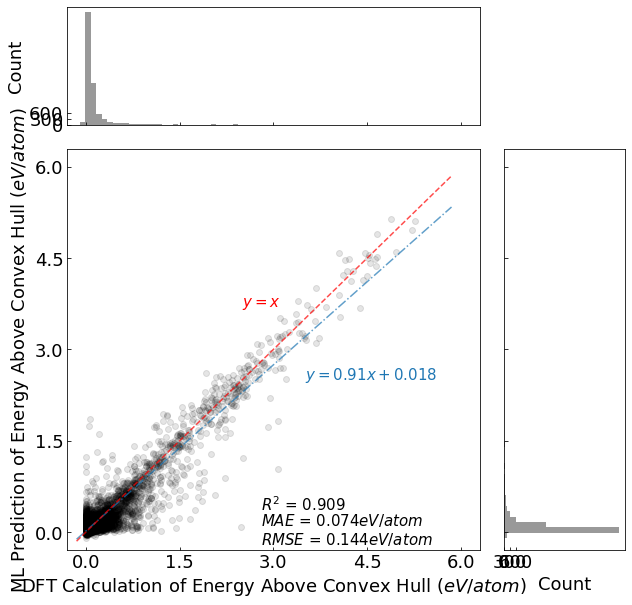

m =  0.909564730765654
c =  0.018117898300893456 

MAE:  0.07444255161723973
MSE:  0.020780421927720047
RMSE:  0.14415416028585526
R-squared:  0.9086323921928182
Max error:  2.400569222041747
Explained_variance_score:  0.9086382002434783


In [8]:
plot(df_pred, adj=False)

[Text(0.5, 0, 'Relevance score'), Text(0, 0.5, 'Feature')]

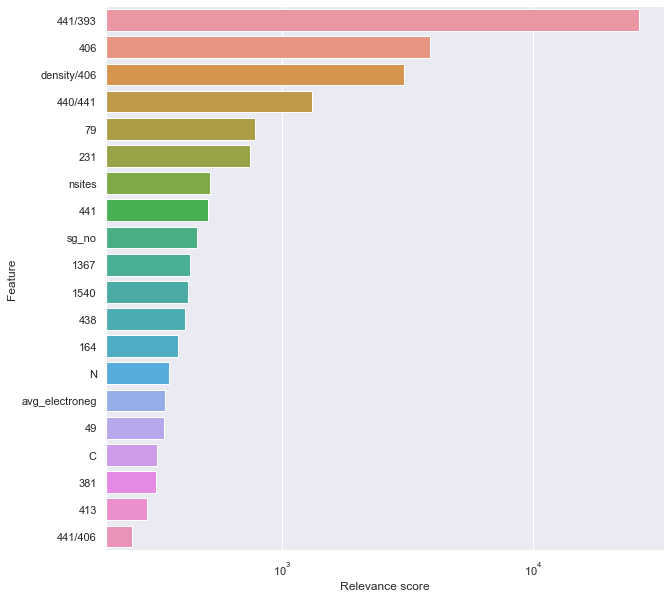

In [9]:
import seaborn as sns

# Generate feature ranking
model = lgbm

feature_score = pd.DataFrame({'feature': features, 'relevance_score': model.feature_importances_})
feature_score = feature_score.sort_values(by = 'relevance_score', ascending = False)
feature_score = feature_score.reset_index(drop = True)


#Plot data of feature relevance 
sns.set(rc = {'figure.figsize':(10, 10)})

# Number of features to plot
no_of_features = 20

fig = sns.barplot(x = 'relevance_score', y = 'feature', data = feature_score[:no_of_features])
fig.set_xscale("log")
fig.set(xlabel = 'Relevance score', ylabel = 'Feature')

#### Bayesian Optimization 

In [1]:
import sys
sys.path.insert(1, 'C:/Users/Songy/OneDrive/Documents/GBSFS4MPP_local/new_properties')

import optimization as opt

import joblib
import pandas as pd
import numpy as np

In [2]:
# Target
target = 'e_above_hull' 

# Path to training data
path = 'C:/Users/Songy/OneDrive/Documents/GBSFS4MPP_local/new_properties/8 other_properties/e_above_hull/'
path_to_save = path + target + '_results/'

# Path to training data
path_to_train_data = path_to_save + 'df_train_' + target + '_engineered.pkl'
path_to_test_data = path_to_save + 'df_test_' + target + '_engineered.pkl'

path_to_features = path_to_save + 'features_selected_from_RFE_' + target + '.pkl' 

problem = 'regression'

scaled = False

In [3]:
# Initialization
final_stage = opt.optimization(
                            path_to_train_data = path_to_train_data,
                            path_to_test_data = path_to_test_data,
                            path_to_save = path_to_save,
                            features = path_to_features,
                            target = target,
                            problem = problem,
                            scaled = scaled
                            )

Name of target column:  e_above_hull
No. of exploratory features:  67


In [4]:
# Choose ML model
final_stage.base_model(boosting_method = 'lightGBM')

LGBMRegressor(importance_type='gain', random_state=42)

In [5]:
# Define hyperparameters; range should be edited directly from the script
final_stage.set_hyperparameters()

(['learning_rate', 'n_estimators', 'num_leaves'],
 [Real(low=0.01, high=1.0, prior='log-uniform', transform='identity'),
  Integer(low=100, high=800, prior='uniform', transform='identity'),
  Integer(low=10, high=100, prior='uniform', transform='identity')])

In [6]:
# optimization_method: dummy_minimize, gp_minimize, gbrt_minimize, forest_minimize
final_stage.run(optimization_method = 'bayesian')

Iteration No: 1 started. Evaluating function at random point.

 {'learning_rate': 0.170827114236171, 'n_estimators': 464, 'num_leaves': 73} 

Score:  0.1537866954419867 

Iteration No: 1 ended. Evaluation done at random point.
Time taken: 7.5735
Function value obtained: 0.1538
Current minimum: 0.1538
Iteration No: 2 started. Evaluating function at random point.

 {'learning_rate': 0.036239388262277995, 'n_estimators': 132, 'num_leaves': 27} 

Score:  0.18046561664007021 

Iteration No: 2 ended. Evaluation done at random point.
Time taken: 2.6369
Function value obtained: 0.1805
Current minimum: 0.1538
Iteration No: 3 started. Evaluating function at random point.

 {'learning_rate': 0.2206410736532062, 'n_estimators': 376, 'num_leaves': 46} 

Score:  0.1563497078638513 

Iteration No: 3 ended. Evaluation done at random point.
Time taken: 4.7553
Function value obtained: 0.1563
Current minimum: 0.1538
Iteration No: 4 started. Evaluating function at random point.

 {'learning_rate': 0.10803

Saved: Optimisation_result_e_above_hull.png


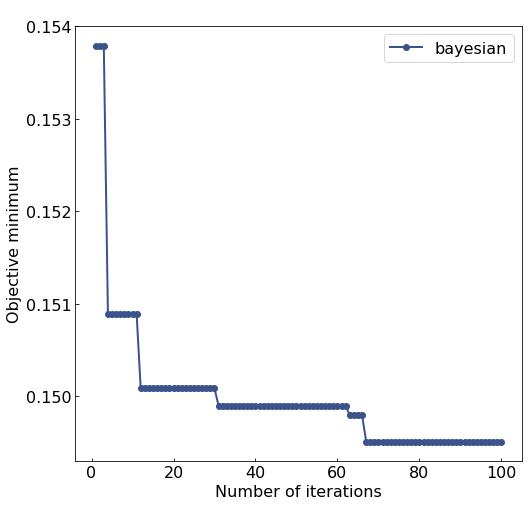

In [7]:
# Plot convergence plot
final_stage.convergence_plot()

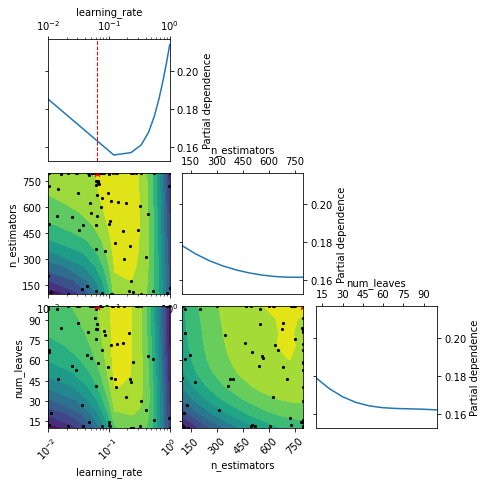

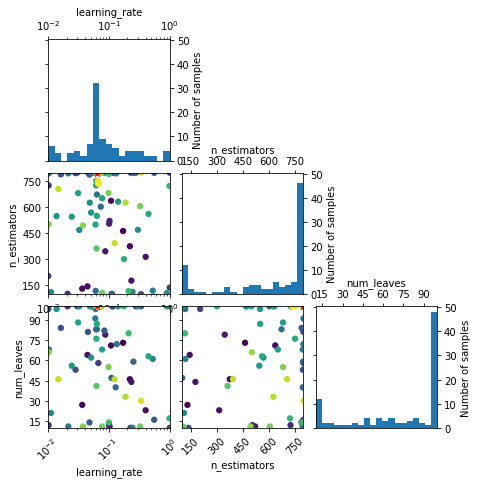

In [8]:
# objective and evaluation plot
final_stage.objective_plot()

In [9]:
# Train model with optimal hyperparameter identified
final_stage.train_model()

LGBMRegressor(importance_type='gain', learning_rate=0.06278217299586036,
              n_estimators=800, num_leaves=100, random_state=42)

                            OLS Regression Results                            
Dep. Variable:            pred_target   R-squared:                       0.914
Model:                            OLS   Adj. R-squared:                  0.914
Method:                 Least Squares   F-statistic:                 1.023e+05
Date:                Thu, 19 May 2022   Prob (F-statistic):               0.00
Time:                        17:16:55   Log-Likelihood:                 5642.8
No. Observations:                9644   AIC:                        -1.128e+04
Df Residuals:                    9642   BIC:                        -1.127e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0166      0.001     11.243   

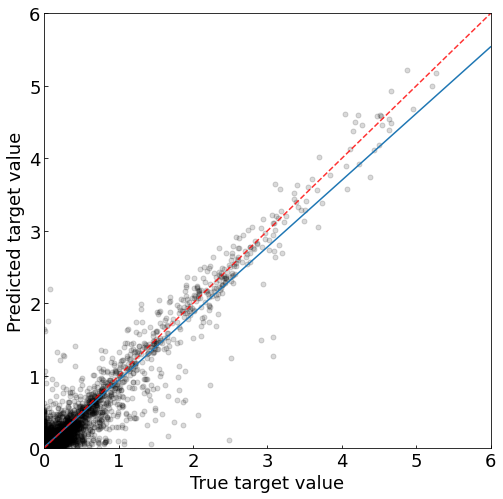

Saved: regression_plot_e_above_hull.png


In [10]:
# Evaluate model using test set
final_stage.evaluate(
                    strategy = 'weighted', 
                    adjusted = False, 
                    max_value = 6,
                    min_value = 0
                    )


### Final Figure

In [1]:
import pandas as pd
import numpy as np
import joblib
import statsmodels.api as sm
import matplotlib.pyplot as plt

from matplotlib.gridspec import GridSpec
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score, max_error
from sklearn.metrics import explained_variance_score,mean_squared_error

from lightgbm.sklearn import LGBMRegressor

In [2]:
# Target
target = 'e_above_hull' 

# Path to training data
path = 'C:/Users/Songy/OneDrive/Documents/GBSFS4MPP_local/new_properties/8 other_properties/e_above_hull/'
path_to_save = path + target + '_results/'

# Features
features = joblib.load(path_to_save + 'features_selected_from_RFE_' + target + '.pkl')
print(len(features))

# Path to training data
df_train = joblib.load(path_to_save + 'df_train_' + target + '_engineered.pkl')
df_test = joblib.load(path_to_save + 'df_test_' + target + '_engineered.pkl')

problem = 'regression'

scaled = False

67


In [3]:
lgbm = LGBMRegressor(
                    boosting_type ='gbdt',
                    objective=problem,
                    importance_type='gain',
                    learning_rate=0.06278217299586036,
                    n_estimators=800,
                    num_leaves=100,
                    max_depth=-1,
                    random_state=42
                    )

lgbm.fit(df_train[features], df_train[target].values.ravel())
lgbm

LGBMRegressor(importance_type='gain', learning_rate=0.06278217299586036,
              n_estimators=800, num_leaves=100, objective='regression',
              random_state=42)

In [4]:
# Predict
predicted_target = lgbm.predict(df_test[features])

# Generate table of results
id_index = df_test.index.tolist()

df_pred = pd.DataFrame({'task_id': id_index,
                        'act_target': df_test[target].values.reshape(1, -1).ravel(),
                        'pred_target': predicted_target
                        })

# Eliminate zeros (?)
df_pred['adj_pred_target'] = df_pred['pred_target']
df_pred['adj_pred_target'] = df_pred['adj_pred_target'].apply(lambda x: 0 if x < 0 else x)

# Define variables
y_test = df_pred['act_target']
y_pred_adj = df_pred['adj_pred_target']
y_pred = df_pred['pred_target']

In [5]:
print('Max value:', df_test[target].max())
print('Min value:', df_test[target].min())

Max value: 5.2618490325
Min value: 0.0


In [6]:
def plot(df_pred, adj=False):
        # Plot results
        max_value = 6
        min_value = 0

        X = df_pred['act_target']
        if adj is True:
                Y = df_pred['adj_pred_target']
        else:
                Y = df_pred['pred_target']

        # Stats
        results = sm.OLS(Y,sm.add_constant(X)).fit()
        print(results.summary())

        # Figure
        fig = plt.figure(figsize=(10, 10), dpi=500) #, dpi=100, facecolor='w', edgecolor='k')
        gs = GridSpec(4, 4)

        ax_scatter = fig.add_subplot(gs[1:4, 0:3])
        ax_hist_y = fig.add_subplot(gs[0,0:3])
        ax_hist_x = fig.add_subplot(gs[1:4, 3])


        fontsize = 18

        # Predicted vs Actual
        ax_scatter.plot(X, Y, 'o', markersize=6, color='black', alpha=0.1)

        offset = 0.15
        # line of best fit
        linear_fit = np.linspace(min_value-offset, max_value-offset, 10)
        ax_scatter.plot(linear_fit, linear_fit*results.params[1] + results.params[0], '-.', color='tab:blue', alpha=0.7)

        # Ideal y=x 
        y = x = np.linspace(min_value-offset, max_value-offset, 10)
        ax_scatter.plot(x, y, '--', color='red', alpha=0.7)

        ticks = np.linspace(min_value, max_value, 5)

        onset = 0.2
        ax_scatter.set_xlabel('DFT Calculation of Energy \n Above Convex Hull ($eV/atom$)', fontsize=fontsize)
        ax_scatter.set_ylabel('ML Prediction of Energy \n Above Convex Hull ($eV/atom$)', fontsize=fontsize)
        ax_scatter.tick_params(axis='both', which='both', labelsize=fontsize, direction="in")
        ax_scatter.set_xlim(min_value-onset, max_value+onset)
        ax_scatter.set_ylim(min_value-onset, max_value+onset)
        ax_scatter.set_xticks(ticks)
        ax_scatter.set_yticks(ticks)

        ax_hist_x.tick_params(axis='both', which='both', labelsize=fontsize, direction="in", labelleft=False)
        ax_hist_x.set_xlabel('Count', fontsize=fontsize)
        ax_hist_x.set_ylim(min_value-onset, max_value+onset)
        ax_hist_x.set_xticks([0, 300, 600])
        ax_hist_x.set_yticks(ticks)

        ax_hist_y.tick_params(axis='both', which='both', labelsize=fontsize, direction="in", labelbottom=False)
        ax_hist_y.set_ylabel('Count', fontsize=fontsize)
        ax_hist_y.set_xlim(min_value-onset, max_value+onset)
        ax_hist_y.set_yticks([0, 300, 600])
        ax_hist_y.set_xticks(ticks)

        # Distribution plots
        alpha = 0.4
        histtype = 'bar' #'step' bar
        color = 'black' #'tab:grey'
        bins = 60 #70

        ax_hist_y.hist(
                        Y, 
                        bins=bins, 
                        color=color, 
                        histtype=histtype,
                        alpha=alpha
                        )
        ax_hist_x.hist(
                        Y, 
                        orientation='horizontal', 
                        bins=bins, 
                        color=color, 
                        histtype=histtype,
                        alpha=alpha
                        )


        #Text in figure
        font1 = {'family': 'DejaVu Sans',
                'color':  'red',
                'weight': 'normal',
                'size': fontsize-3,
                }

        font2 = {'family': 'DejaVu Sans',
                'color':  'tab:blue',
                'weight': 'normal',
                'size': fontsize-3,
                }

        font3 = {'family': 'DejaVu Sans', #'serif',
                'color':  'black',
                'weight': 'normal',
                'size': fontsize-3,
                }

        ax_scatter.text(2.5, 3.7, r'$y = x$', fontdict=font1)
        ax_scatter.text(3.5, 2.5, r'$y = ' + str(round(results.params[1],3)) + 'x +' + str(round(results.params[0],3)) + '$', fontdict=font2)

        x_co = 3.2
        y_co = 0
        r2 = r2_score(X, Y)
        ax_scatter.text(x_co, y_co+0.55, r'$R^{2}$ = ' + str(round(r2,3)), fontdict=font3)

        mae = mean_absolute_error(X, Y)
        ax_scatter.text(x_co, y_co+0.3, r'$MAE$ = ' + str(round(mae,3)) + '$ eV/atom$', fontdict=font3)

        mse = mean_squared_error(X, Y, squared=False)
        ax_scatter.text(x_co, y_co, r'$RMSE$ = ' + str(round(mse,3)) + '$ eV/atom$', fontdict=font3)

        #final_figure
        #fig.savefig('final_regression_mag_v1.png', dpi = 500, bbox_inches="tight")

        plt.show()

        print('m = ', results.params[1])
        print('c = ', results.params[0], '\n')

        print('MAE: ', mean_absolute_error(X, Y))
        print('MSE: ', mean_squared_error(X, Y))
        print('RMSE: ', mean_squared_error(X, Y, squared=False))
        print('R-squared: ', r2_score(X, Y))
        print('Max error: ', max_error(X, Y))
        print('Explained_variance_score: ', explained_variance_score(X, Y, multioutput='variance_weighted'))

                            OLS Regression Results                            
Dep. Variable:            pred_target   R-squared:                       0.913
Model:                            OLS   Adj. R-squared:                  0.913
Method:                 Least Squares   F-statistic:                 1.015e+05
Date:                Sun, 04 Jun 2023   Prob (F-statistic):               0.00
Time:                        13:45:29   Log-Likelihood:                 5594.0
No. Observations:                9644   AIC:                        -1.118e+04
Df Residuals:                    9642   BIC:                        -1.117e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0172      0.001     11.574      0.0

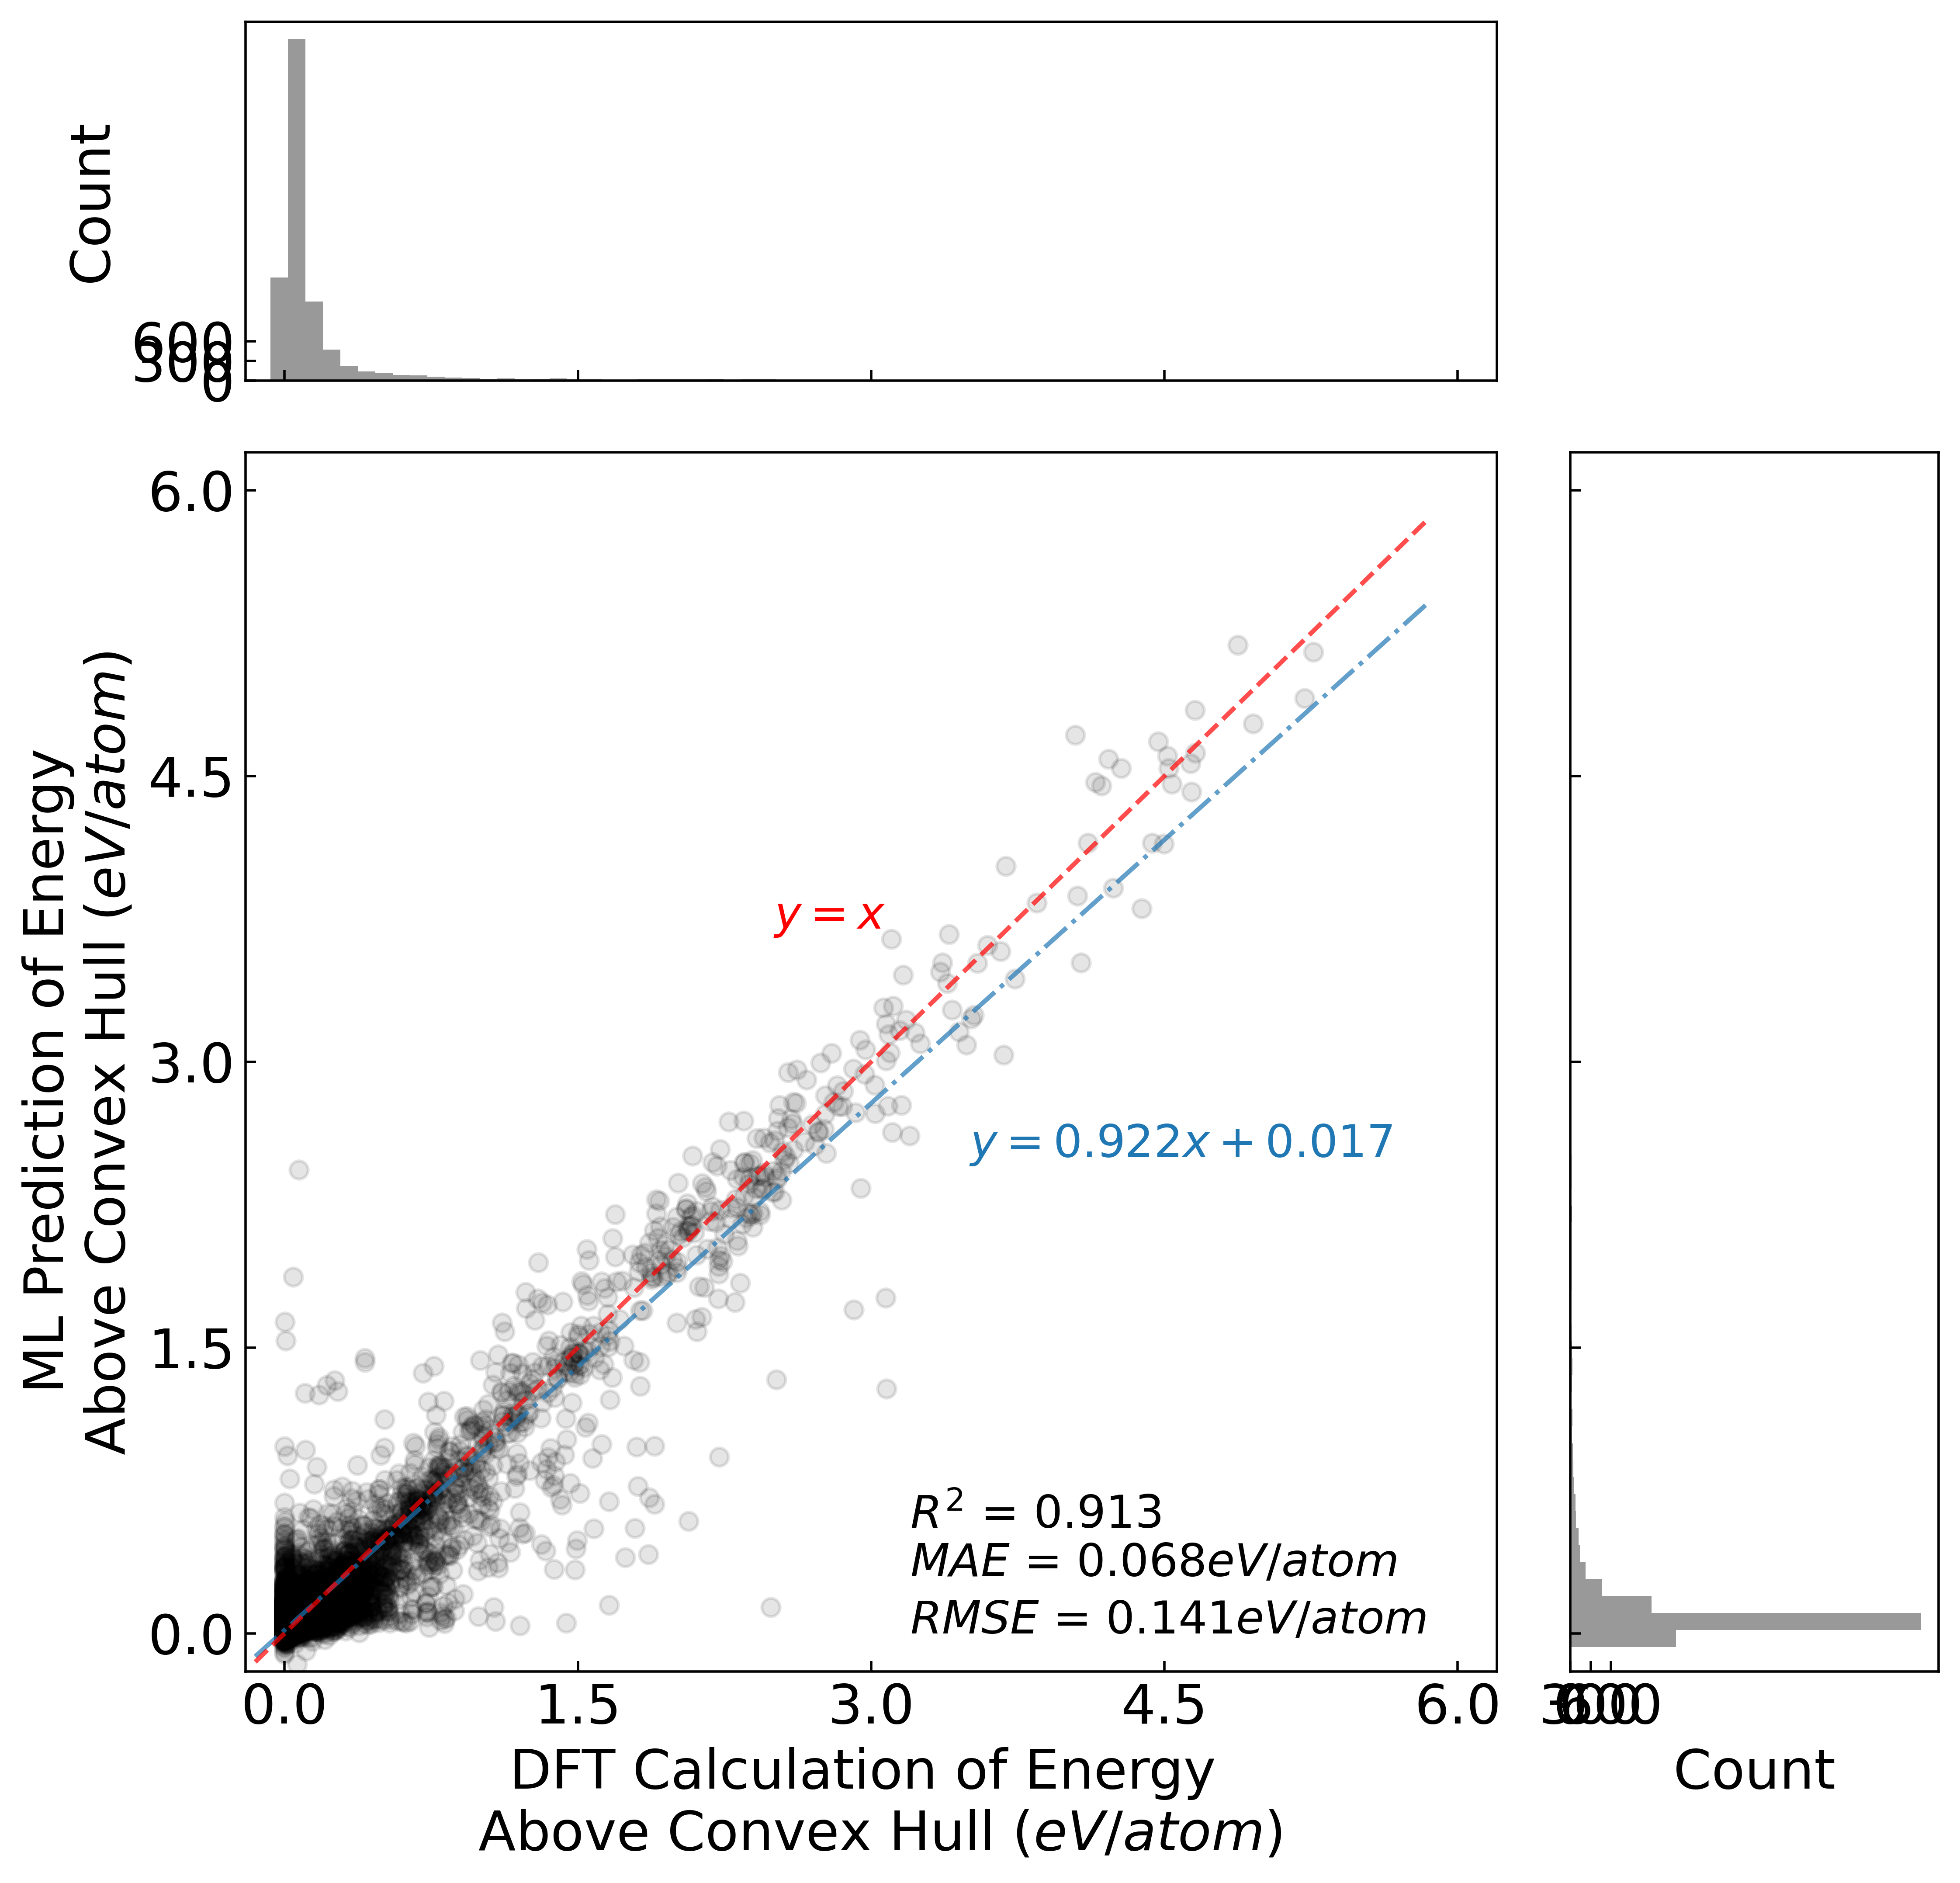

m =  0.9218758522830022
c =  0.017160149954493175 

MAE:  0.06822271130708052
MSE:  0.019747239292661943
RMSE:  0.14052487072636624
R-squared:  0.9131751019665431
Max error:  2.3612959395812743
Explained_variance_score:  0.913202616080703


In [7]:
plot(df_pred, adj=False)

[Text(0.5, 0, 'Relevance score'), Text(0, 0.5, 'Feature')]

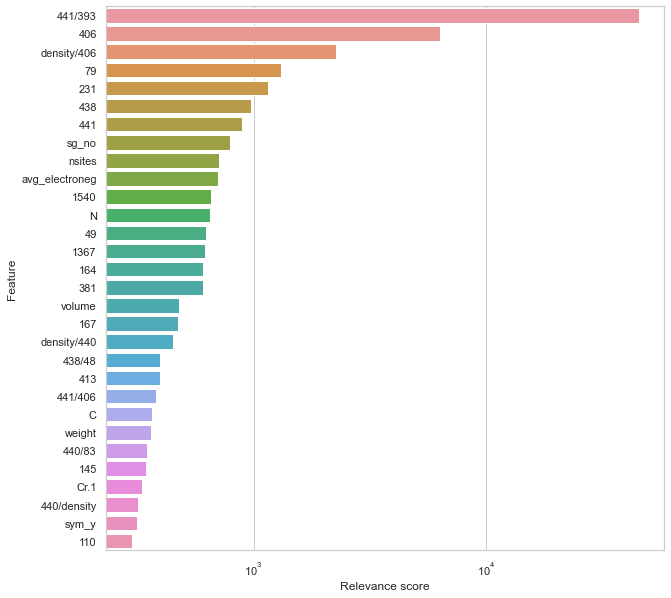

In [8]:
import seaborn as sns

# Generate feature ranking
model = lgbm

feature_score = pd.DataFrame({'feature': features, 'relevance_score': model.feature_importances_})
feature_score = feature_score.sort_values(by = 'relevance_score', ascending = False)
feature_score = feature_score.reset_index(drop = True)

#Plot data of feature relevance 
sns.set(rc = {'figure.figsize':(10, 10)})
sns.set_style("whitegrid")

# Number of features to plot
no_of_features = 30

fig = sns.barplot(x = 'relevance_score', y = 'feature', data = feature_score[:no_of_features])
fig.set_xscale("log")
fig.set(xlabel = 'Relevance score', ylabel = 'Feature')

# plt.savefig('feature_relevance_plot_experimental_bayesian_scaffold_split_v2.png', dpi = 300)